C:\Users\84945\AppData\Local\Temp\ipykernel_2960\1306754733.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\84945\AppData\Local\Temp\ipykernel_2960\1306754733.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


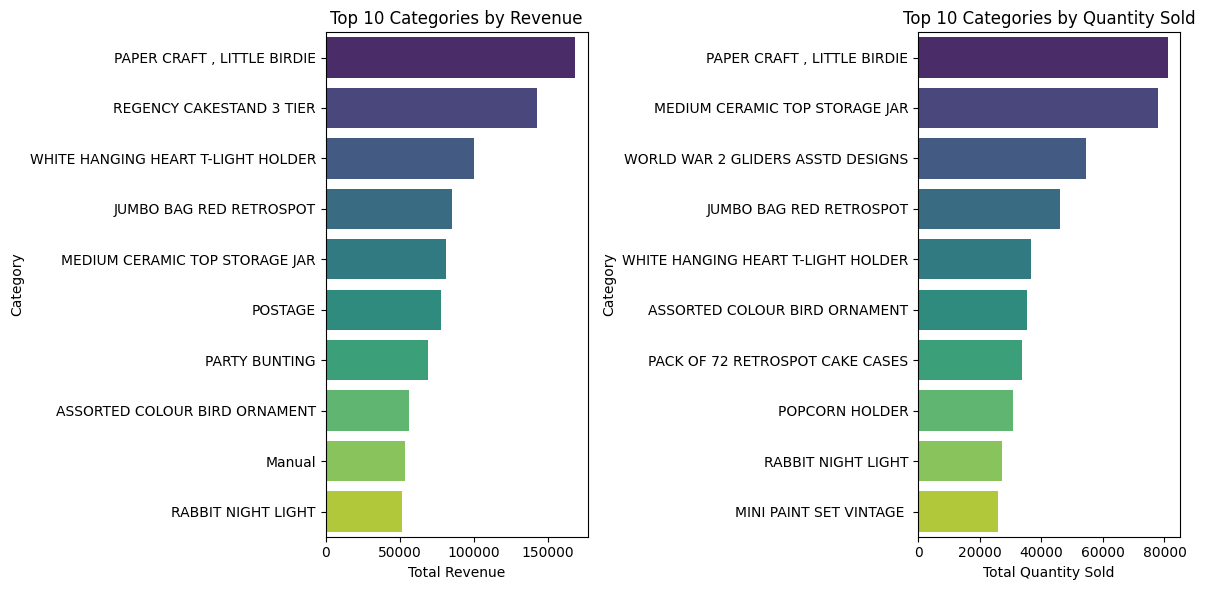

Top 10 Categories by Revenue:
                                Category  Total_Quantity_Sold  Total_Revenue  \
2319         PAPER CRAFT , LITTLE BIRDIE                80995      168469.60   
2767            REGENCY CAKESTAND 3 TIER                12412      142592.95   
3698  WHITE HANGING HEART T-LIGHT HOLDER                36725      100448.15   
1762             JUMBO BAG RED RETROSPOT                46181       85220.78   
1992      MEDIUM CERAMIC TOP STORAGE JAR                77916       81416.73   
2611                             POSTAGE                 3120       77803.96   
2345                       PARTY BUNTING                15295       68844.33   
216        ASSORTED COLOUR BIRD ORNAMENT                35362       56580.34   
2130                              Manual                 7179       53779.93   
2656                  RABBIT NIGHT LIGHT                27202       51346.20   

      Unique_Customers  
2319                 1  
2767               881  
3698          

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset (using UCI Online Retail Dataset)
def load_ecommerce_data():
    """
    Note: You'll need to download the dataset from:
    https://archive.ics.uci.edu/ml/datasets/Online+Retail
    """
    df = pd.read_excel('Online Retail.xlsx')
    
    # Basic data cleaning
    df.dropna(inplace=True)
    df = df[df['Quantity'] > 0]
    
    # Calculate total sales per transaction
    df['TotalSales'] = df['Quantity'] * df['UnitPrice']
    
    return df

# Product Category Performance Analysis
def analyze_category_performance(df):
    # Group by product description (assuming this represents category)
    category_performance = df.groupby('Description').agg({
        'Quantity': 'sum',
        'TotalSales': 'sum',
        'CustomerID': 'nunique'
    }).reset_index()
    
    # Rename columns for clarity
    category_performance.columns = [
        'Category', 
        'Total_Quantity_Sold', 
        'Total_Revenue', 
        'Unique_Customers'
    ]
    
    # Sort by total revenue
    category_performance_sorted = category_performance.sort_values(
        'Total_Revenue', 
        ascending=False
    )
    
    return category_performance_sorted

# Visualize Top Product Categories
def visualize_top_categories(category_performance, top_n=10):
    plt.figure(figsize=(12, 6))
    
    # Top Categories by Revenue
    plt.subplot(1, 2, 1)
    top_revenue = category_performance.head(top_n)
    sns.barplot(
        x='Total_Revenue', 
        y='Category', 
        data=top_revenue, 
        palette='viridis'
    )
    plt.title(f'Top {top_n} Categories by Revenue')
    plt.xlabel('Total Revenue')
    
    # Top Categories by Quantity
    plt.subplot(1, 2, 2)
    top_quantity = category_performance.sort_values(
        'Total_Quantity_Sold', 
        ascending=False
    ).head(top_n)
    sns.barplot(
        x='Total_Quantity_Sold', 
        y='Category', 
        data=top_quantity, 
        palette='viridis'
    )
    plt.title(f'Top {top_n} Categories by Quantity Sold')
    plt.xlabel('Total Quantity Sold')
    
    plt.tight_layout()
    plt.show()

# Customer Segmentation by Category Preference
def category_customer_segmentation(df):
    # Prepare data for clustering
    category_customer_matrix = df.groupby([
        'CustomerID', 'Description'
    ])['TotalSales'].sum().unstack().fillna(0)
    
    # Normalize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(category_customer_matrix)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    category_customer_matrix['Cluster'] = kmeans.fit_predict(normalized_data)
    
    return category_customer_matrix

# Main Execution
def main():
    # Load the data
    df = load_ecommerce_data()
    
    # Analyze category performance
    category_performance = analyze_category_performance(df)
    
    # Visualize top categories
    visualize_top_categories(category_performance)
    
    # Perform customer segmentation
    customer_segments = category_customer_segmentation(df)
    
    # Print insights
    print("Top 10 Categories by Revenue:")
    print(category_performance.head(10))

    # Identify interesting categories
    interesting_categories = category_performance[
        (category_performance['Total_Revenue'] > category_performance['Total_Revenue'].mean()) & 
        (category_performance['Unique_Customers'] < category_performance['Unique_Customers'].mean())
    ]
    print("\nInteresting Categories:")
    print(interesting_categories)

    # Analyze customer segments
    print("\nCustomer Segment Distribution:")
    print(customer_segments['Cluster'].value_counts())

main()